<a href="https://colab.research.google.com/github/dustinober1/Titanic-Disaster/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Passengers Who Sailed on the Titanic

This code reads in a csv file located at the given url "https://raw.githubusercontent.com/jeffprosise/Practical-Machine-Learning/main/Chapter%203/Data/titanic.csv" and creates a pandas DataFrame df containing the data.

pd.read_csv() is a function from the pandas library that reads a csv file and returns a DataFrame. The argument to read_csv() is the path or url to the csv file.

df.head() is a method of the pandas DataFrame that returns the first 5 rows of the DataFrame. It is used here to display the top of the DataFrame.

So, the resulting DataFrame shows the first 5 rows of the Titanic dataset, which contains information about the passengers who were aboard the Titanic when it sank, including their age, sex, ticket class, and survival status. The columns in the DataFrame include "PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", and "Embarked".

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/jeffprosise/Practical-Machine-Learning/main/Chapter%203/Data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This code displays information about the DataFrame df using the info() method of the DataFrame.

info() provides a summary of the DataFrame, including the number of non-null values in each column, the data type of each column, and the amount of memory used by the DataFrame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This code performs several operations on the DataFrame df:

1. It selects a subset of the columns in the DataFrame, specifically "Survived", "Age", "Sex", and "Pclass", using the indexing operator [].

2. It uses the pd.get_dummies() function to create one-hot encoded columns for the "Sex" and "Pclass" columns of the DataFrame. This converts the categorical variables "Sex" and "Pclass" into numerical variables that can be used in a machine learning model.
3. It drops any rows with missing values using the dropna() method of the DataFrame.
4. Finally, it displays the first 5 rows of the resulting DataFrame using the head() method of the DataFrame.

The resulting DataFrame contains one-hot encoded columns for "Sex" and "Pclass", with no missing values. The columns in the DataFrame are "Survived", "Age", "Sex_female", "Sex_male", "Pclass_1", "Pclass_2", and "Pclass_3". The "Survived" column indicates whether the passenger survived the sinking of the Titanic (1) or not (0), the "Age" column contains the passenger's age, and the one-hot encoded columns indicate the passenger's sex and ticket class.





In [5]:
df = df[["Survived", "Age", "Sex", "Pclass"]]
df = pd.get_dummies(df, columns=["Sex", "Pclass"])
df.dropna(inplace=True) 
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1


This code uses the train_test_split() function from scikit-learn to split the DataFrame df into training and testing sets.

The input variables x and y are defined using the DataFrame df: x is a DataFrame that contains all the columns of df except for the "Survived" column, and y is a Series that contains only the "Survived" column of df.

The train_test_split() function then splits the data into training and testing sets. The test_size parameter specifies the fraction of the data that should be used for testing (in this case, 20% of the data). The stratify parameter is used to ensure that the classes in y are evenly represented in both the training and testing sets. The random_state parameter is used to ensure that the results are reproducible.

The resulting variables x_train, x_test, y_train, and y_test contain the training and testing sets, respectively. The x_train and x_test DataFrames contain all the columns of x, while y_train and y_test are Series containing only the "Survived" column.

In [6]:
from sklearn.model_selection import train_test_split

x = df.drop("Survived", axis=1)
y = df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=0)

This code trains a logistic regression model using scikit-learn's LogisticRegression class, and then uses the trained model to make predictions on the test data and calculate the model's accuracy.

The first line of code creates an instance of the LogisticRegression class with a random_state of 0. The random_state parameter is used to ensure that the results are reproducible.

The second line of code fits the logistic regression model to the training data using the fit() method of the model object. The fit() method learns the parameters of the logistic regression model from the training data.

The third line of code uses the score() method of the model object to calculate the accuracy of the model on the test data. The score() method returns the mean accuracy on the given test data and labels. The accuracy is a measure of how well the model is able to correctly predict the survival status of passengers in the test data, and is calculated as the fraction of correct predictions.

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8321678321678322

This code uses scikit-learn's cross_val_score() function to perform cross-validation on the logistic regression model.

The cross_val_score() function is a convenient way to perform k-fold cross-validation, which involves splitting the data into k subsets, and using each subset in turn as a validation set while the model is trained on the remaining k-1 subsets.

The first argument to cross_val_score() is the model object (model). The second and third arguments are the input features (x) and target variable (y). The cv parameter is used to specify the number of folds to use in the cross-validation (in this case, 5 folds).

The cross_val_score() function returns an array of accuracy scores, one for each fold. The mean() method is then used to compute the mean accuracy score across all the folds. This gives an estimate of the model's performance on unseen data, and is a more reliable estimate than the single accuracy score computed on the test data in the previous code snippet.

In [8]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

0.7857480547621394

This code creates a confusion matrix plot using scikit-learn's ConfusionMatrixDisplay class.

The from_estimator() method of the ConfusionMatrixDisplay class is used to generate the confusion matrix for the logistic regression model. The first argument is the model object (model). The second and third arguments are the input features (x_test) and target variable (y_test) for the test data.

The display_labels parameter is used to specify the class labels ("Perished" and "Survived") that will be displayed on the x and y axes of the plot.

The cmap parameter is used to specify the color map for the plot (in this case, "Blues").

The xticks_rotation parameter is used to specify the rotation angle for the x-axis tick labels (in this case, "vertical").

The resulting plot shows the number of true positives (top left), false positives (top right), false negatives (bottom left), and true negatives (bottom right) for the logistic regression model on the test data. The diagonal elements (true positives and true negatives) show the number of correct predictions, while the off-diagonal elements (false positives and false negatives) show the number of incorrect predictions.

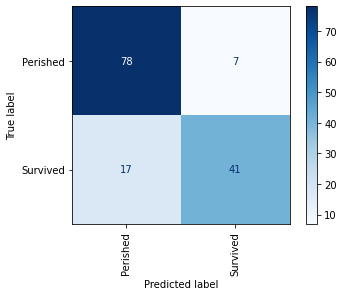

In [9]:
%matplotlib inline 
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test,
                   display_labels = ["Perished", "Survived"],
                   cmap="Blues", xticks_rotation="vertical")

In this code, scikit-learn's precision_score and recall_score functions are used to calculate the precision and recall of the logistic regression model's predictions on the test data.

The predicted target variable (y_pred) is obtained by calling the predict method on the model object with the input features (x_test) as the argument.

The precision_score function is then called with the true target variable (y_test) and the predicted target variable (y_pred) as arguments to compute the precision of the model's predictions.

Similarly, the recall_score function is called with y_test and y_pred as arguments to compute the recall of the model's predictions.

The recall variable is assigned the same value as sensitivity, as these terms are often used interchangeably to refer to the same metric.

The specificity variable is computed by calling the recall_score function again with y_test, y_pred, and pos_label=0 as arguments. The pos_label parameter is used to specify which class label is considered the "positive" class for the calculation of recall. In this case, the value of pos_label is set to 0 (which corresponds to the "Perished" class) to calculate the recall of the "Perished" class. The resulting value is equal to the specificity of the model's predictions for the "Survived" class.

In [10]:
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(x_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensitivity = recall
specificity = recall_score(y_test, y_pred, pos_label=0)

In [11]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

Precision: 0.8541666666666666
Recall: 0.7068965517241379
Sensitivity: 0.7068965517241379
Specificity: 0.9176470588235294


This code creates a pandas DataFrame called female with one row of input features for a hypothetical female passenger with age 30, who is traveling in first class.

The DataFrame is then passed as an argument to the predict method of the logistic regression model model. The value of model.predict(female) is an array containing the predicted class label (0 or 1) for the given input features. Since female corresponds to a hypothetical female passenger, the predicted class label represents the model's prediction of whether the passenger would have survived the Titanic disaster.

The [0] at the end of the code is used to extract the first (and only) element of the predicted class label array as a scalar value, which is then returned by the expression. Therefore, the code predicts whether the hypothetical female passenger would have survived the Titanic disaster.

In [12]:
female = pd.DataFrame({"Age": [30], "Sex_female": [1], "Sex_male": [0],
                       "Pclass_1": [1], "Pclass_2": [0], "Pclass_3": [0]})
model.predict(female)[0]

1

The code below calculates the predicted probability of survival for the hypothetical female passenger with input features specified in the female DataFrame. The predict_proba method of the logistic regression model model returns the predicted probabilities of each class label (0 and 1) for the input features. Since we are interested in the probability of survival (class label 1), we access the probability of class label 1 by indexing the second element of the predicted probabilities array returned by model.predict_proba(female) using [0][1].

The formatted string f"Probability of Survival: {probability: .1%}" prints the probability of survival as a percentage with one decimal point. The output of the code tells us the predicted probability of survival for the hypothetical female passenger.

In [13]:
probability = model.predict_proba(female)[0][1]
print(f"Probability of Survival: {probability: .1%}")

Probability of Survival:  91.6%


The predict method of the logistic regression model model is used to predict the class label (0 or 1) for the input features. We pass the male DataFrame as input to the predict method and access the first element of the predicted class label array using [0].

Next, the predict_proba method of the logistic regression model model is used to calculate the predicted probabilities of each class label (0 and 1) for the input features. Since we are interested in the probability of survival (class label 1), we access the probability of class label 1 by indexing the second element of the predicted probabilities array returned by model.predict_proba(male) using [0][1].

Finally, the formatted string f"Probability of Survival: {probability: .1%}" prints the probability of survival as a percentage with one decimal point. The output of the code tells us the predicted probability of survival for the hypothetical male passenger.

In [14]:
male = pd.DataFrame({"Age": [60], "Sex_female": [0], "Sex_male": [1],
                       "Pclass_1": [0], "Pclass_2": [0], "Pclass_3": [1]})
model.predict(female)[0]
probability = model.predict_proba(male)[0][1]
print(f"Probability of Survival: {probability: .1%}")

Probability of Survival:  2.9%
